In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
import ast

import iqplot

import bokeh.io
import bokeh.models
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

In [4]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

TrackingAnalysis


In [59]:
Data = pd.read_csv('/Users/ulric/Desktop/Gated_arenas_Beh_manual_All.csv')
Data.head()

,Date,Fly,Training,Test,Behaviour,Gate,Count,Comments,Codename
0,220304,1,Ctrl,Starved_noWater,looping,Left,0,NaN,NaN
1,220304,1,Ctrl,Starved_noWater,LPeeking,Left,0,NaN,NaN
2,220304,1,Ctrl,Starved_noWater,Peeking,Left,3,NaN,111346_s0a0_p0-0
3,220304,1,Ctrl,Starved_noWater,squeezing,Left,0,NaN,NaN
4,220304,1,Ctrl,Starved_noWater,looping,Right,0,NaN,NaN


In [25]:
Data = Data.explode('Gate') # wtf
Data['Gate'] = Data['Gate'].astype('string')
Data = Data.explode('Count') # wtf
Data['Count'] = Data['Count'].astype('float')


<function matplotlib.pyplot.show(close=None, block=None)>

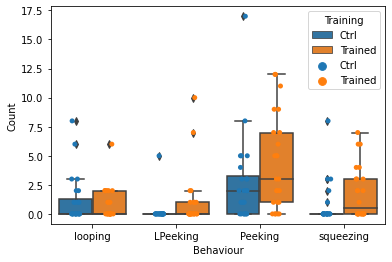

In [27]:
sns.boxplot(x=Data.Behaviour, y = Data.Count, hue=Data.Training)
sns.stripplot(x=Data.Behaviour, y = Data.Count, hue=Data.Training, dodge=True)
#sns.catplot(x=Data.Behaviour, y = Data.Count,
        #    hue=Data.Training,
         #   col=Data.Gate)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

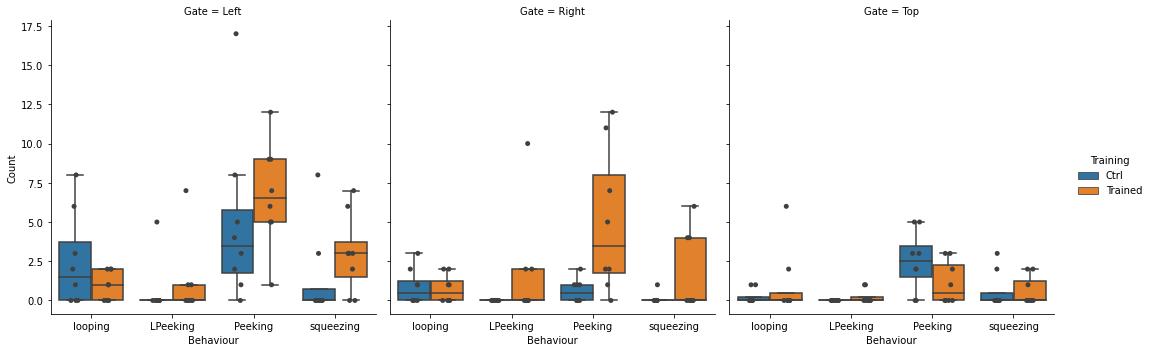

In [36]:
g=sns.catplot(x='Behaviour', y = 'Count',
            hue='Training', showfliers = False,
            col='Gate', kind="box",
            data= Data)
g.map_dataframe(sns.stripplot,x='Behaviour', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

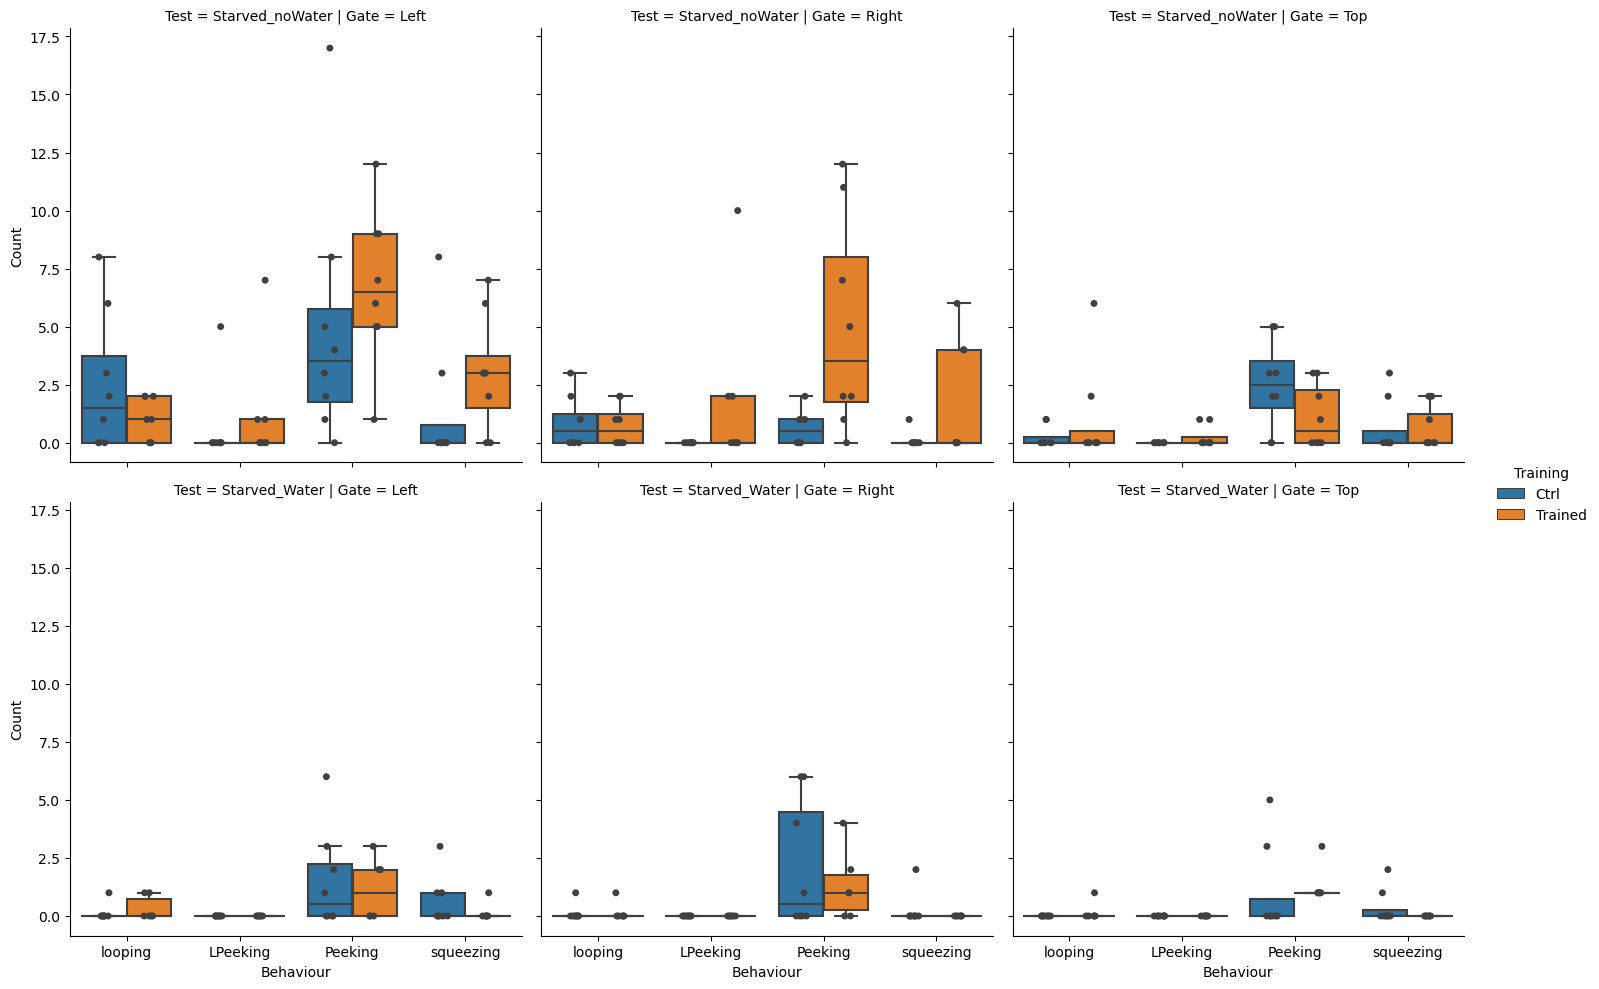

In [61]:
g=sns.catplot(x='Behaviour', y = 'Count',
            hue='Training', showfliers = False,
            col='Gate', kind="box", row='Test',
            data= Data)
g.map_dataframe(sns.stripplot,x='Behaviour', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

plt.savefig('/Volumes/Universal_HD/VideoAnalysis/GatedArenas/Plots/Estimates/ManualPlot.png')

<function matplotlib.pyplot.show(close=None, block=None)>

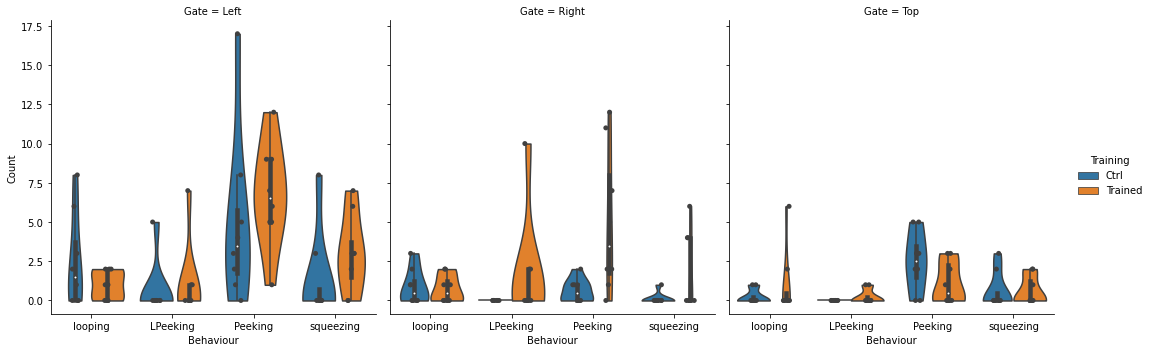

In [40]:
g=sns.catplot(x='Behaviour', y = 'Count',
            hue='Training', showfliers = False,
            cut=0,
            col='Gate', kind="violin",
            data= Data)
g.map_dataframe(sns.stripplot,x='Behaviour', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

In [42]:
Peekings = Data[Data.Behaviour == 'Peeking']

In [43]:
Peekings

,Date,Fly,Training,Test,Behaviour,Gate,Count,Comments,Codename
2,220304,1,Ctrl,Starved_noWater,Peeking,Left,3.0,NaN,111346_s0a0_p0-0
6,220304,1,Ctrl,Starved_noWater,Peeking,Right,0.0,NaN,NaN
10,220304,1,Ctrl,Starved_noWater,Peeking,Top,5.0,NaN,NaN
14,220304,2,Ctrl,Starved_noWater,Peeking,Left,17.0,"PER, peeking associated with PER",133752_s0a0_p0-0
18,220304,2,Ctrl,Starved_noWater,Peeking,Right,2.0,NaN,NaN
22,220304,2,Ctrl,Starved_noWater,Peeking,Top,3.0,NaN,NaN
26,220304,3,Ctrl,Starved_noWater,Peeking,Left,8.0,Lots of PER,142838_s0a0_p0-0
30,220304,3,Ctrl,Starved_noWater,Peeking,Right,0.0,NaN,NaN
34,220304,3,Ctrl,Starved_noWater,Peeking,Top,2.0,NaN,NaN
38,220310,4,Ctrl,Starved_noWater,Peeking,Left,0.0,Lots of PER,091535_s0a0_p0-0


In [46]:
Peekings_Left = Peekings[Data.Gate == 'Left']

Peekings_Left_Ctrl = Peekings_Left[Data.Training == 'Ctrl']

/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_29462/2064939946.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Peekings_Left = Peekings[Data.Gate == 'Left']
/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_29462/2064939946.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Peekings_Left_Ctrl = Peekings_Left[Data.Training == 'Ctrl']


In [47]:
Peekings_Left_Ctrl

,Date,Fly,Training,Test,Behaviour,Gate,Count,Comments,Codename
2,220304,1,Ctrl,Starved_noWater,Peeking,Left,3.0,NaN,111346_s0a0_p0-0
14,220304,2,Ctrl,Starved_noWater,Peeking,Left,17.0,"PER, peeking associated with PER",133752_s0a0_p0-0
26,220304,3,Ctrl,Starved_noWater,Peeking,Left,8.0,Lots of PER,142838_s0a0_p0-0
38,220310,4,Ctrl,Starved_noWater,Peeking,Left,0.0,Lots of PER,091535_s0a0_p0-0
50,220310,5,Ctrl,Starved_noWater,Peeking,Left,2.0,Few PER,100841_s0a0_p0-0
62,220310,6,Ctrl,Starved_noWater,Peeking,Left,4.0,Several PER events,111825_s0a0_p0-0
74,220310,7,Ctrl,Starved_noWater,Peeking,Left,5.0,Few PER,122530_s0a0_p0-0
86,220310,8,Ctrl,Starved_noWater,Peeking,Left,1.0,NoPER events,131701_s0a0_p0-0


In [62]:
Set = Peekings_Left_Ctrl.Count
Set = np.asarray(Set)

In [64]:
from scipy.stats import bootstrap



res = bootstrap(Set, statistic=np.mean ,confidence_level=0.9)
print(res.confidence_interval)

ValueError: each sample in `data` must contain two or more observations along `axis`.

In [68]:
Sorted=Data.groupby(['Behaviour'])

In [71]:
np.mean(Data['Count'])

1.609375

In [88]:
Stat_Data = Data.groupby(['Behaviour', 'Training'])['Count']

Stat_Data.mean()

Behaviour  Training
LPeeking   Ctrl        0.208333
           Trained     1.041667
Peeking    Ctrl        2.708333
           Trained     4.291667
looping    Ctrl        1.208333
           Trained     0.916667
squeezing  Ctrl        0.708333
           Trained     1.791667
Name: Count, dtype: float64

In [93]:
ExData = Data[(Data.Training == 'Ctrl') & (Data.Behaviour == 'Peeking')]

Sample = ExData.Count

In [99]:
rg = np.random.default_rng()

bs_sample = rg.choice(Sample, replace=True, size=len(Sample))

In [100]:
bs_sample

array([ 5,  2,  0,  2,  5,  2,  1,  1,  1,  0,  5,  2,  1,  2, 17,  0,  5,
        3,  4,  1,  0,  5,  0,  2])

In [101]:
bs_replicate = np.mean(bs_sample)
bs_replicate

2.75

In [102]:
# Number of replicatess
n_reps = 2000

# Initialize bootstrap replicas array
bs_reps_1975 = np.empty(n_reps)

# Compute replicates
for i in range(n_reps):
    bs_sample = rg.choice(Sample, size=len(Sample))
    bs_reps_1975[i] = np.mean(bs_sample)

<AxesSubplot:ylabel='Proportion'>

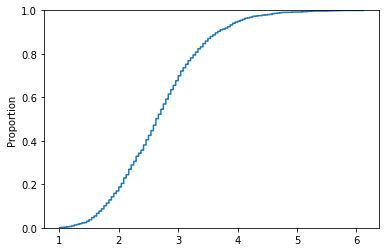

In [103]:
sns.ecdfplot(bs_reps_1975)

In [119]:
def draw_bs_rep(data, func, rg):
    """Compute a bootstrap replicate from data."""
    bs_sample = rg.choice(data, size=len(data))
    return func(bs_sample)

def draw_bs_ci(data, func=np.mean, rg=rg, n_reps=2000):
    """Sample bootstrap multiple times and compute confidence interval"""
    bs_reps = np.array(
        [draw_bs_rep(data, func, rg) for _ in range(n_reps)]
    )
    conf_int = np.percentile(bs_reps,[2.5, 97.5])
    return(conf_int)

In [115]:
bs_reps_1975 = np.array(
    [draw_bs_rep(Sample, np.mean, rg) for _ in range(n_reps)]
)

conf_int_1975 = np.percentile(bs_reps_1975, [2.5, 97.5])
conf_int_1975

array([1.45833333, 4.334375  ])

In [117]:
conf_int_1975 = draw_bs_ci(Sample, np.mean,rg, n_reps=2000)
conf_int_1975

array([1.45833333, 4.29166667])

In [154]:
Stat_Data=Data.groupby(['Behaviour', 'Training'])

Groups = list(Stat_Data.groups.keys())

In [189]:
ConfInts = Stat_Data['Count'].apply(lambda x: draw_bs_ci(x))
Means = Stat_Data['Count'].mean()

In [ ]:
CIs=sns.catplot(x='Behaviour', y = 'Count',
            hue='Training', showfliers = False,
            cut=0,
            col='Gate', kind="violin",
            data= Data)
CIs.map_dataframe(sns.stripplot,x='Behaviour', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

In [185]:
ConfInts.values

array([array([0.   , 0.625]), array([0.25 , 2.125]),
       array([1.5       , 4.29166667]), array([2.79166667, 5.83333333]),
       array([0.5     , 2.084375]), array([0.41666667, 1.5       ]),
       array([0.125, 1.5  ]), array([0.95833333, 2.75      ])],
      dtype=object)

In [236]:
Intervals = ConfInts.values

In [223]:
#Categories = Means.axes[0]
Categories = []
for sublist in Means.axes:
    for item in sublist:
        Categories.append(item)


In [226]:
X_axis = ['_'.join(tups) for tups in Categories]

TypeError: unhashable type: 'numpy.ndarray'

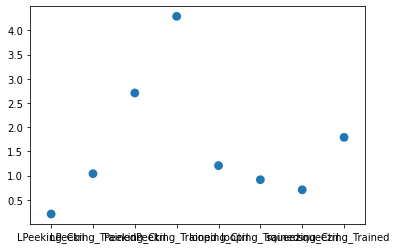

In [233]:
sns.pointplot(x=X_axis,y=Means.values, join = False)
sns.lineplot(x=X_axis, y=ConfInts.values)


/Users/ulric/opt/anaconda3/envs/Plotting/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

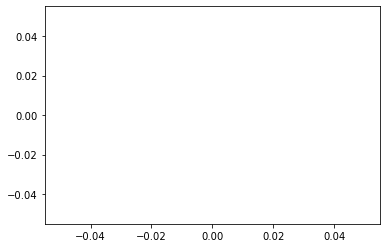

In [235]:
sns.lineplot(ConfInts.values[0])

In [234]:
ConfInts.values[1]

array([0.25      , 2.08333333])

In [62]:
AutoData = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/AutoDataSet.csv')
AutoData.head()

,Unnamed: 0,Date,Training,Starvation,Relative Time Left,Relative Time Right,Relative Time far Left,Relative Time far Right,Reinforced_side,Peeks Left,Peeks Right,Peeks Top,Face Left,Face Right,Face Top,Long Peeks Left,Long Peeks Right,Long Peeks Top
0,0,22-03-04,Ctrl,Overnight no Water,0.358036,0.641964,0.196914,0.354057,Empty,1.0,0.0,1.0,2.0,7.0,5.0,1.0,0.0,1.0
1,0,22-03-04,Ctrl,Overnight no Water,0.557286,0.442714,0.478373,0.332078,Empty,11.0,1.0,1.0,3.0,1.0,1.0,6.0,0.0,0.0
2,0,22-03-04,Ctrl,Overnight no Water,0.745746,0.254254,0.523853,0.174992,Empty,2.0,1.0,2.0,8.0,0.0,4.0,0.0,0.0,1.0
3,0,22-03-04,Ctrl,Overnight with water,0.515069,0.484931,0.357243,0.219925,Empty,1.0,1.0,3.0,4.0,2.0,6.0,0.0,1.0,2.0
4,0,22-03-04,Ctrl,Overnight with water,0.674293,0.325707,0.478666,0.024975,Empty,2.0,0.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0


In [94]:
#AutoData.columns=AutoData.columns.droplevel(0)
Melted = pd.melt(AutoData, id_vars=['Training', 'Starvation', 'Date'], value_name = 'Count', value_vars=['Peeks Left', 'Peeks Right', 'Peeks Top', 'Long Peeks Left', 'Long Peeks Right', 'Long Peeks Top'], var_name='Gate')

Melted = Melted.loc[Melted['Starvation'] == 'Overnight no Water']

Melted['Beh'] = 'Value'
Melted['Side'] = 'Value'

In [95]:
Melted['Beh'].loc[(Melted['Gate'].str.contains('Long'))] = 'Squeezing'
Melted['Beh'].loc[(Melted['Gate'].str.contains('Long')==False)] = 'Peeking'

Melted['Side'].loc[(Melted['Gate'].str.contains('Left'))] = 'Rewarded Side'
Melted['Side'].loc[(Melted['Gate'].str.contains('Right'))] = 'Punished Side'
Melted['Side'].loc[(Melted['Gate'].str.contains('Top'))] = 'Empty Side'

/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gq/T/ipykernel_73612/4268629769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melted['Beh'].loc[(Melted['Gate'].str.contains('Long'))] = 'Squeezing'
/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gq/T/ipykernel_73612/4268629769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melted['Beh'].loc[(Melted['Gate'].str.contains('Long')==False)] = 'Peeking'
/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gq/T/ipykernel_73612/4268629769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

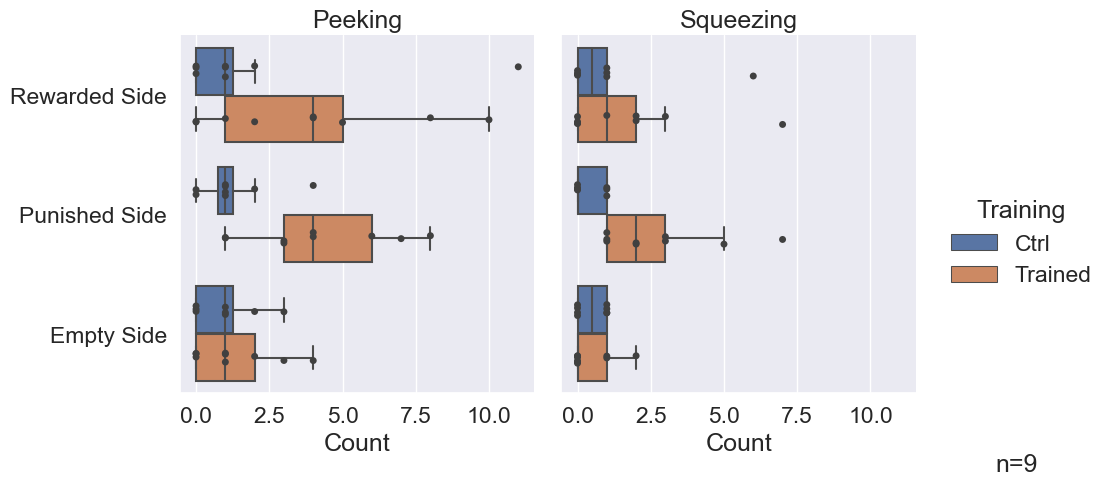

In [99]:
sns.set(font_scale=1.5)


g=sns.catplot(x='Count', y = 'Side',
            hue='Training', showfliers = False,
            col='Beh',
            kind="box", #row='Starvation',
            data= Melted)
g.map_dataframe(sns.stripplot,x='Count', y = 'Side',
            hue='Training', dodge=True,
            palette=["#404040"])
g.set(
      #xlabel="Relative time spent in 'rewarded' side",
      ylabel='',
      #yticks=['Rewarded side', 'Punished side', 'Empty side'],
      #xlim=(0,1),
      #xticks=np.arange(0,1,0.1),
      )

plt.text(15, 3,
         'n=9',
         horizontalalignment='center',
         verticalalignment='top',
         )
ax= g.axes
ax[0][0].set_title('Peeking')
ax[0][1].set_title('Squeezing')
#g._legend.remove()
plt.show

plt.savefig('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/AutoPlot_Old.png')

In [90]:
ax[0][0].set_title('TheTest')

Text(0.5, 1.0, 'TheTest')

In [57]:
TimeData = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas_Agar/Results/DataSetTest.csv')

TimeData.head()

,Unnamed: 0,Date,Fly,Training,Starvation,Relative Time Left,Relative Time Right,Relative Time far Left,Relative Time far Right,Reinforced_side,...,Visits Right Corner,Durations Right Corner,Visits Top Corner,Durations Top Corner,Visits Left Front,Durations Left Front,Visits Right Front,Durations Right Front,Visits Top Front,Durations Top Front
0,0,22-03-10,1,Trained,Overnight no Water,0.445191,0.554809,0.229559,0.274985,Right,...,"[3, 54, 121, 198, 211, 687, 784, 847, 903, 951...","[7, 20, 76, 5, 20, 13, 3, 16, 7, 31, 35, 11, 8...","[3, 830, 906, 1029, 1396, 1534, 1692, 1809, 18...","[37, 11, 47, 362, 4, 19, 42, 13, 31, 37, 38, 1...","[105, 301, 628, 1246, 1631, 1894, 2016, 2218, ...","[43, 58, 47, 23, 139, 29, 115, 75, 25, 7, 28, ...","[3, 118, 183, 793, 910, 999, 1078, 1175, 1444,...","[20, 6, 39, 15, 5, 12, 22, 26, 306, 3, 6, 2, 1...","[795, 931, 1055, 1177, 1179, 1713, 2001, 2221,...","[29, 17, 26, 1, 7, 74, 32, 1, 30, 13, 32, 196,..."
1,0,22-03-10,2,Trained,Overnight no Water,0.458867,0.541133,0.247927,0.191526,Left,...,"[86, 264, 314, 317, 710, 867, 960, 1084, 2036,...","[6, 16, 2, 1, 18, 28, 24, 732, 5, 39, 21, 53, ...","[3, 9, 168, 238, 272, 443, 541, 665, 868, 932,...","[1, 11, 5, 11, 53, 6, 37, 17, 20, 30, 27, 53, ...","[6, 82, 256, 865, 1003, 1012, 1080, 1209, 1380...","[2, 21, 172, 37, 4, 2, 75, 22, 21, 22, 36, 532...","[3, 76, 201, 301, 451, 556, 1139, 1445, 1577, ...","[3, 32, 12, 20, 21, 27, 117, 34, 135, 177, 10,...","[3, 224, 338, 438, 633, 823, 1339, 1568, 1654,...","[24, 20, 18, 109, 35, 409, 227, 14, 10, 46, 53..."
2,0,22-03-10,3,Trained,Overnight no Water,0.508440,0.491560,0.416981,0.396896,Left,...,"[19, 134, 210, 927, 1016, 1108, 1397, 1496, 19...","[3, 31, 663, 30, 25, 114, 73, 63, 16, 92, 20, ...","[3, 339, 639, 742, 813, 868, 1195, 1421, 1493,...","[24, 5, 11, 19, 23, 53, 6, 8, 41, 3, 25, 5, 42...","[3, 175, 401, 472, 927, 944, 1199, 1270, 1430,...","[23, 36, 12, 81, 3, 34, 31, 31, 4, 24, 21, 3, ...","[57, 1138, 1311, 1555, 1864, 2075, 2164, 2581,...","[266, 43, 62, 98, 69, 33, 31, 31, 24, 11, 55, ...","[3, 294, 444, 1751, 1902, 2083, 2496, 2736, 30...","[22, 29, 18, 13, 14, 11, 31, 23, 46, 21, 25, 2..."
3,0,22-03-10,4,Trained,Overnight no Water,0.687568,0.312432,0.242062,0.188678,Right,...,"[252, 1285, 3208]","[15, 19, 860]","[405, 1989, 3923, 4110, 4256, 4265, 6052, 6646...","[550, 67, 18, 15, 1, 1151, 64, 69, 105, 97, 55...","[56, 655, 1036, 2141, 5245, 5263, 6014, 8417, ...","[29, 35, 874, 3090, 17, 2, 89, 235, 209, 8, 1,...","[314, 1190, 1456, 2304, 2787, 4183, 4422, 7345]","[46, 3, 123, 27, 859, 8, 688, 206]","[452, 4311, 6446, 6494, 6510, 6751, 7628, 7644...","[2875, 146, 46, 15, 43, 876, 1, 1, 2, 1, 1087,..."
4,0,22-03-10,5,Trained,Not starved,0.449296,0.550704,0.252304,0.298756,Right,...,"[1784, 3687, 4025, 4521, 4993, 5162, 5356, 572...","[1450, 40, 19, 191, 2, 8, 98, 129, 24, 30, 31]","[92, 400, 576, 2472, 3642, 4208]","[138, 147, 13, 90, 39, 21]","[4214, 4695, 9666, 16189, 16440, 17095, 17382,...","[138, 4701, 5980, 122, 612, 111, 64, 129, 56, 77]","[193, 7862, 10042, 10800, 11230, 11590, 11850,...","[6804, 1574, 138, 178, 66, 44, 1020, 88, 94, 2...","[3, 4220, 4941, 5354, 6673, 6969, 7518, 8198, ...","[158, 449, 25, 811, 73, 169, 205, 64, 55, 566,..."


In [24]:
not_list_cols = [col for col in TimeData.columns if col not in ['Visits Left Corner', 'Durations Left Corner']] #list of columns you are not exploding (assume col1 and col2 are being exploded)
TimeData2 = TimeData.set_index(not_list_cols).apply(pd.Series.explode).reset_index()

#TimeData2 = TimeData.explode('Visits Left Corner')

#TimeData.explode(['Durations Left Corner', 'Visits Left Corner'])
TimeData2
#TimeMelted = pd.melt(Unpacked, id_vars=['Training', 'Starvation'], value_name = 'Timestamps', value_vars=['Visits Left Corner'], var_name='Gate')

,Unnamed: 0,Date,Training,Starvation,Relative Time Left,Relative Time Right,Relative Time far Left,Relative Time far Right,Reinforced_side,Peeks Left,Peeks Right,Peeks Top,Face Left,Face Right,Face Top,Long Peeks Left,Long Peeks Right,Long Peeks Top,Visits Left Corner,Durations Left Corner
0,0,22-03-10,Trained,Overnight no Water,0.445191,0.554809,0.229559,0.274985,Right,1.0,0.0,3.0,5.0,8.0,8.0,0.0,0.0,2.0,"[55, 506, 541, 621, 748, 823, 1073, 1189, 1279...","[41, 33, 4, 5, 7, 21, 7, 24, 1, 52, 28, 8, 54,..."
1,0,22-03-10,Trained,Overnight no Water,0.458867,0.541133,0.247927,0.191526,Left,1.0,1.0,3.0,6.0,5.0,6.0,0.0,1.0,3.0,"[3, 55, 173, 725, 817, 1248, 1495, 2884, 3104,...","[10, 18, 37, 20, 6, 13, 282, 30, 47, 21, 95, 5..."
2,0,22-03-10,Trained,Overnight no Water,0.508440,0.491560,0.416981,0.396896,Left,3.0,5.0,1.0,0.0,3.0,0.0,1.0,4.0,0.0,"[97, 294, 339, 857, 994, 1065, 1368, 1496, 156...","[39, 6, 78, 103, 43, 46, 55, 3, 62, 5, 89, 69,..."
3,0,22-03-10,Trained,Overnight no Water,0.687568,0.312432,0.242062,0.188678,Right,0.0,1.0,3.0,8.0,3.0,7.0,0.0,1.0,3.0,"[49, 787, 1086, 1245, 3320, 3564, 3699, 4010, ...","[26, 5, 58, 50, 47, 19, 22, 8, 50, 36]"
4,0,22-03-10,Trained,Not starved,0.449296,0.550704,0.252304,0.298756,Right,1.0,2.0,0.0,3.0,5.0,5.0,1.0,1.0,0.0,"[100, 639, 901, 1157, 1198, 1284]","[476, 146, 49, 31, 22, 23]"
5,0,22-03-10,Trained,Not starved,0.472355,0.527645,0.328391,0.315888,Left,0.0,0.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,"[78, 217, 296, 493, 616, 856, 1918, 2039, 2311...","[33, 43, 60, 46, 53, 41, 3, 69, 8, 40, 79, 87,..."
6,0,22-03-10,Trained,Not starved,0.662436,0.337564,0.358842,0.182018,Left,4.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,"[91, 316, 510, 632, 854, 1064, 1287, 1560, 173...","[33, 10, 24, 56, 12, 45, 14, 17, 2, 100, 5, 68..."
7,0,22-03-10,Trained,Not starved,0.593114,0.406886,0.291531,0.218271,Right,1.0,1.0,0.0,8.0,5.0,4.0,0.0,1.0,0.0,"[61, 255, 337, 526, 803, 1341, 1397, 1642, 187...","[97, 9, 52, 135, 130, 7, 45, 53, 31, 1, 140, 6..."
8,0,22-03-10,Ctrl,Overnight no Water,0.461967,0.538033,0.315720,0.398278,Right,1.0,1.0,0.0,7.0,7.0,6.0,0.0,1.0,0.0,"[12, 703, 773, 851, 940, 1116, 1256, 1312, 159...","[33, 22, 11, 2, 20, 32, 3, 58, 44, 30, 12, 75,..."
9,0,22-03-10,Ctrl,Overnight no Water,0.434615,0.565385,0.232345,0.298044,Left,0.0,0.0,0.0,4.0,4.0,10.0,0.0,0.0,0.0,"[74, 234, 443, 1027, 1130, 1395, 1608, 1819, 2...","[32, 14, 5, 2, 37, 26, 19, 8, 14, 39, 62, 39, ..."


In [ ]:
TimeData = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas_Agar/Results/DataSetTest.csv')
TimeData.head()

TimeData[['Visits Left Corner', 'Durations Left Corner',
          'Visits Right Corner', 'Durations Right Corner',
          'Visits Top Corner', 'Durations Top Corner',
          'Visits Left Front', 'Durations Left Front',
          'Visits Right Front', 'Durations Right Front',
          'Visits Top Front', 'Durations Top Front']] = TimeData[['Visits Left Corner', 'Durations Left Corner',
          'Visits Right Corner', 'Durations Right Corner',
          'Visits Top Corner', 'Durations Top Corner',
          'Visits Left Front', 'Durations Left Front',
          'Visits Right Front', 'Durations Right Front',
          'Visits Top Front', 'Durations Top Front']].applymap(ast.literal_eval)

TimeData = TimeData.explode(['Visits Left Corner', 'Durations Left Corner',]).reset_index().drop("index",1)\
    .explode(['Visits Right Corner', 'Durations Right Corner',]).reset_index().drop("index",1)\
    .explode(['Visits Top Corner', 'Durations Top Corner',]).reset_index().drop("index",1)\
    .explode(['Visits Left Front', 'Durations Left Front',]).reset_index().drop("index",1)\
    .explode(['Visits Right Front', 'Durations Right Front',]).reset_index().drop("index",1)\
    .explode(['Visits Top Front', 'Durations Top Front']).reset_index().drop("index",1)\



#TimeData.loc[TimeData.astype(str).drop_duplicates().index]

TimeData

/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_35511/1461190675.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  TimeData = TimeData.explode(['Visits Left Corner', 'Durations Left Corner',]).reset_index().drop("index",1)\
/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_35511/1461190675.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .explode(['Visits Right Corner', 'Durations Right Corner',]).reset_index().drop("index",1)\
/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_35511/1461190675.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .explode(['Visits Top Corner', 'Durations Top Corner',]).reset_index().drop("index",1)\


In [34]:
print(TimeData2['Visits Left Corner'][0])
print(TimeData2['Durations Left Corner'][0])

[55, 506, 541, 621, 748, 823, 1073, 1189, 1279, 1459, 1657, 1749, 2805, 2964, 3049, 3400]
[41, 33, 4, 5, 7, 21, 7, 24, 1, 52, 28, 8, 54, 4, 43, 235]


In [45]:
TimeMelted = pd.melt(TimeData, id_vars=['Training', 'Starvation', 'Date', 'Fly'], value_name = 'Values',
                     value_vars=['Visits Left Corner', 'Durations Left Corner',
          'Visits Right Corner', 'Durations Right Corner',
          'Visits Top Corner', 'Durations Top Corner',
          'Visits Left Front', 'Durations Left Front',
          'Visits Right Front', 'Durations Right Front',
          'Visits Top Front', 'Durations Top Front'],
                     var_name="Variable")

TimeMelted[['Values',]] = TimeMelted[['Values',]].applymap(ast.literal_eval)
TimeMelted = TimeMelted.explode('Values').drop_duplicates()

In [50]:
LeftCornerVisits = TimeMelted[TimeMelted['Variable'].isin(['Visits Left Corner', 'Durations Left Corner'])].reset_index().pivot_table(index = ['Fly', 'Training'], columns = 'Variable', values = 'Values').reset_index()

In [35]:
#LeftCornerVisits.pivot(columns = 'Variable')['Values']
LeftCornerVisits=LeftCornerVisits.set_index(['Variable'])['Values'].unstack()
LeftCornerVisits

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [55]:
# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration'
)


p.circle(
    source= LeftCornerVisits[LeftCornerVisits['Training']== 'Trained'],
    x='Visits Left Corner',
    y='Durations Left Corner',
    legend_label = 'Trained flies'
)

p.circle(
    source=LeftCornerVisits[LeftCornerVisits['Training']== 'Ctrl'],
    x='Visits Left Corner',
    y='Durations Left Corner',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)

In [55]:
# First time related plot

Data = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/DataSetAugust22.csv')
Data.head()
Data = Data[Data['Test Starvation'] == "Overnight no Water"]
Data = Data[Data["Training Starvation"] == "Not starved"]  #.reset_index()


In [56]:
Data['TimeSpentRewSide'] = 'i'

conditions = [
    ((Data["Reinforced_side"].str.contains("Left"))),
    ((Data["Reinforced_side"].str.contains("Right"))),
]
values = [
    Data['Relative Time Left'],
    Data['Relative Time Right'],
]
Data["TimeSpentRewSide"] = np.select(conditions, values)

#Data['TimeSpentRewSide'] = Data['Relative Time Left'] if Data['Reinforced_side'].str.contains('Left') else Data['Relative Time Right']

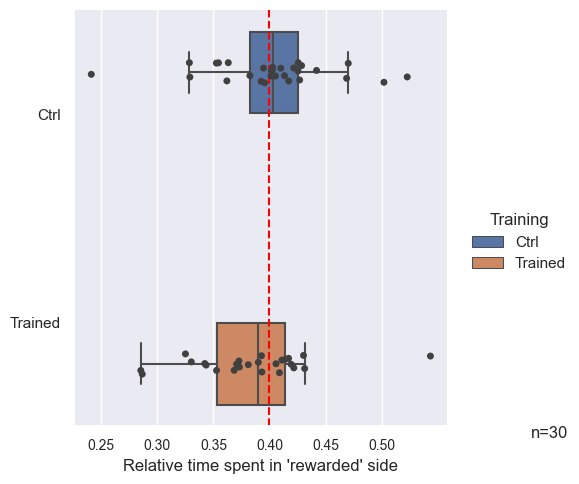

In [57]:
sns.set_theme(font_scale=1.5)
sns.set(rc={'figure.figsize':(10, 15)})

g=sns.catplot(x='TimeSpentRewSide', y = 'Training',
            hue='Training', showfliers = False,
            #col='Gate',
            kind="box",
            #row='Test',
            data= Data)
g.set_xticklabels(size= 10)
g.map_dataframe(sns.stripplot,x='TimeSpentRewSide', y = 'Training',
            hue='Training', dodge=True,
            palette=["#404040"])
g.refline(x=0.5,
          color = "red",
          )
g.set(
      xlabel="Relative time spent in 'rewarded' side",
      ylabel='',
      #xlim=(0,1),
      #xticks=np.arange(0,1,0.1),
      )
plt.text(1, 1.5,
         'n=30',
         horizontalalignment='center',
         verticalalignment='top',
         )

plt.show
plt.savefig('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/TimeSpentLR.png')